#**Activity_2**

## **Data Extraction**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import dataset
data = pd.read_csv('data_download 1Jul2021_to_30Jul2021.csv')


In [ ]:
# Get the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   symbol              221046 non-null  object 
 1   exchange            221046 non-null  object 
 2   date                221046 non-null  object 
 3   adjusted close      221046 non-null  float64
 4   option symbol       221046 non-null  object 
 5   expiration          221046 non-null  object 
 6   strike              221046 non-null  float64
 7   call/put            221046 non-null  object 
 8   style               221046 non-null  object 
 9   ask                 221046 non-null  float64
 10  bid                 221046 non-null  float64
 11  mean price          221046 non-null  float64
 12  iv                  221046 non-null  float64
 13  volume              221046 non-null  int64  
 14  open interest       221046 non-null  int64  
 15  stock price for iv  221046 non-nul

In [ ]:
# Create a new dataframe from the dataset
df = pd.DataFrame(data)

In [ ]:
# Check the dataframe
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0.0,0.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0.0,1401.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0.0,1.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50.0,328.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0.0,0.0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get the description of the data in the dataframe
df.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,26780.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000
mean,439.421541,403.709026,38.544683,37.876703,38.209538,0.228780,431.953098,1847.899511,439.357331,0.102184,0.424039,0.005971,-0.045160,-0.040599
std,1.000500,88.545751,57.916310,57.288980,57.601601,0.241398,5320.763725,6654.635893,0.638051,0.618641,0.503953,0.009674,0.041086,1.510170
min,438.510000,25.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,438.620000,-1.000000,0.000000,0.000000,-0.560042,-15.350967
25%,438.510000,359.000000,1.110000,1.030000,1.075000,0.132789,0.000000,2.000000,438.970000,-0.222063,0.044293,0.000672,-0.063111,-0.083228
50%,438.830000,417.000000,13.750000,13.220000,13.460000,0.205274,0.000000,120.000000,438.970000,0.000000,0.222178,0.002774,-0.037964,0.000000
75%,440.650000,458.000000,47.075000,46.180000,46.615000,0.311458,20.000000,1014.000000,440.130000,0.743345,0.616758,0.006837,-0.013723,0.247962
max,440.650000,655.000000,415.740000,414.400000,415.070000,1.741315,332808.000000,169905.000000,440.130000,1.000000,2.666904,0.148015,0.000000,5.556179


## **Data Validation and Cleansing**

In [ ]:
# Check how many unique values are there in Symbol column
print(df.symbol.unique())

['SPY']


In [ ]:
# Symbol column has only value 'SPY' which is not useful for the further analysis, So we eliminate the column from the datafarme
df.drop('symbol', inplace=True, axis=1)

In [ ]:
# Check how many unique values are there in Exchange column
print(df.exchange.unique())

['NYSEArca']


In [ ]:
# Exchange column has only value 'NYSEArca' which is not useful for the further analysis, So we eliminate the column from the datafarme
df.drop('exchange', inplace=True, axis=1)

In [ ]:
# We drop the 'style' and '*' columns which are don't have any uniqe value and not useful for the further analysis
df.drop('style', inplace=True, axis=1)
df.drop('*', inplace=True, axis=1)

In [ ]:
# We drop the option symbol as well, because it is a combined field which has the value of symbol, date,call/put and strike and we have those values in separate column in the dataframe
df.drop('option symbol', inplace=True, axis=1)

In [ ]:
# Check whether all the unwanted columns were removed
print(df.keys())

Index(['date', 'adjusted close', 'expiration', 'strike', 'call/put', 'ask',
       'bid', 'mean price', 'iv', 'volume', 'open interest',
       'stock price for iv', 'delta', 'vega', 'gamma', 'theta', 'rho'],
      dtype='object')


In [ ]:
# Check the datatype of each column
df.dtypes

date                   object
adjusted close        float64
expiration             object
strike                float64
call/put               object
ask                   float64
bid                   float64
mean price            float64
iv                    float64
volume                float64
open interest         float64
stock price for iv    float64
delta                 float64
vega                  float64
gamma                 float64
theta                 float64
rho                   float64
dtype: object

In [ ]:
# Change the datatype of 'date' and 'expiration' from object to datetime
df["date"] = pd.to_datetime(df["date"])
df["expiration"] = pd.to_datetime(df["expiration"])

In [ ]:
# Change the datatype of 'call/put' from object to int
df['call/put'] = df['call/put'].map({'C': 1, 'P': 0})

In [ ]:
df

,date,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,2021-07-30,438.51,2021-07-30,215.0,1.0,224.56,223.35,223.955,-1.000000,0.0,0.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-07-30,438.51,2021-07-30,215.0,0.0,0.01,0.00,0.000,-1.000000,0.0,1401.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-07-30,438.51,2021-07-30,220.0,1.0,219.56,218.35,218.955,-1.000000,0.0,1.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-07-30,438.51,2021-07-30,220.0,0.0,0.01,0.00,0.000,-1.000000,50.0,328.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-07-30,438.51,2021-07-30,225.0,1.0,214.56,213.35,213.955,-1.000000,0.0,0.0,438.97,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26775,2021-07-28,438.83,2021-10-15,525.0,0.0,87.73,87.35,87.540,0.173580,0.0,0.0,438.62,-0.984042,0.069914,0.000967,-0.020129,-1.123662
26776,2021-07-28,438.83,2021-10-15,530.0,1.0,0.03,0.02,0.025,0.147034,0.0,118.0,438.62,0.002826,0.017688,0.000289,-0.001609,0.002629
26777,2021-07-28,438.83,2021-10-15,530.0,0.0,92.70,92.37,92.535,0.180737,0.0,0.0,438.62,-0.984770,0.066608,0.000885,-0.020060,-1.135165
26778,2021-07-28,438.83,2021-10-15,535.0,1.0,0.03,0.02,0.025,0.153468,0.0,236.0,438.62,0.002719,0.017080,0.000267,-0.001624,0.002527


In [ ]:
# Change the datatype of 'theta' from object to float

df['theta'] = df['theta'].astype(float)

In [ ]:
# Check the datatype of each column
df.dtypes

date                  datetime64[ns]
adjusted close               float64
expiration            datetime64[ns]
strike                       float64
call/put                     float64
ask                          float64
bid                          float64
mean price                   float64
iv                           float64
volume                       float64
open interest                float64
stock price for iv           float64
delta                        float64
vega                         float64
gamma                        float64
theta                        float64
rho                          float64
dtype: object

In [ ]:
# Remove the record which has the NULL value

print("Before removes the rows that contains NULL values:" ,(len(df)))
df = df.dropna()
print("Aefore removes the rows that contains NULL values:",(len(df)))




Before removes the rows that contains NULL values: 26780
Aefore removes the rows that contains NULL values: 26779


In [ ]:
# Save the processed dataframe as a csv file
df.to_csv('data_set.csv', index=False)

## **Data Aggregation & Representation**

Date and the expiration attributes has to converted to date type object and also we have to find the different of days between this attribute and this value also has to be in the data set.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['expiration'] = pd.to_datetime(df['expiration'])
df['DateGap'] = df['expiration'].sub(df['date'], axis=0)

<ipython-input-26-ab5dbb3ce46b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-26-ab5dbb3ce46b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expiration'] = pd.to_datetime(df['expiration'])
<ipython-input-26-ab5dbb3ce46b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Converting the date to int

In [ ]:
df['DateGap'] = df['DateGap'].dt.days

<ipython-input-27-62f04c35d927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateGap'] = df['DateGap'].dt.days


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26779 entries, 0 to 26778
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                26779 non-null  datetime64[ns]
 1   adjusted close      26779 non-null  float64       
 2   expiration          26779 non-null  datetime64[ns]
 3   strike              26779 non-null  float64       
 4   call/put            26779 non-null  float64       
 5   ask                 26779 non-null  float64       
 6   bid                 26779 non-null  float64       
 7   mean price          26779 non-null  float64       
 8   iv                  26779 non-null  float64       
 9   volume              26779 non-null  float64       
 10  open interest       26779 non-null  float64       
 11  stock price for iv  26779 non-null  float64       
 12  delta               26779 non-null  float64       
 13  vega                26779 non-null  float64   

## **Visualization**

### Distribution of of the key values

<Axes: ylabel='Density'>

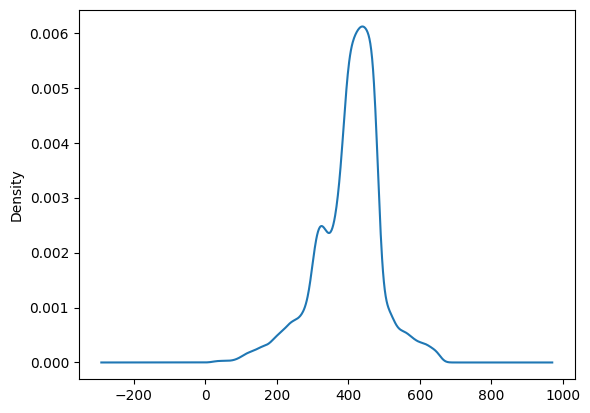

In [ ]:
# Plot the distribution of strike
df['strike'].plot(kind='kde')

# Observed a normal distribution

<Axes: ylabel='Density'>

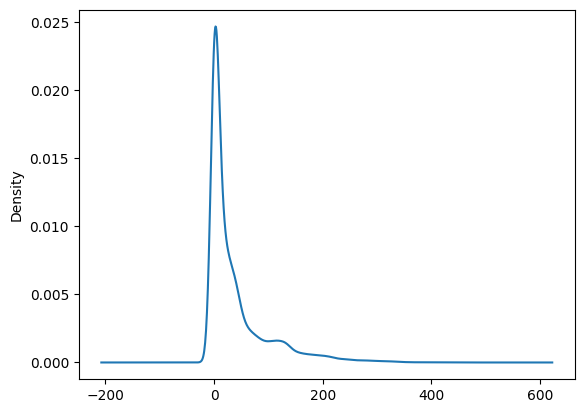

In [ ]:
# Plot the distribution of mean price
df['mean price'].plot(kind='kde')

# Observed a right skewed distribution

<Axes: ylabel='Density'>

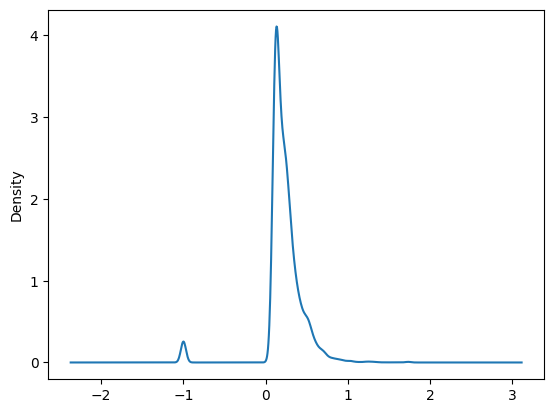

In [ ]:
# Plot the distribution of iv
df['iv'].plot(kind='kde')

# Observed a right skewed distribution and also the outliers

<Axes: ylabel='Density'>

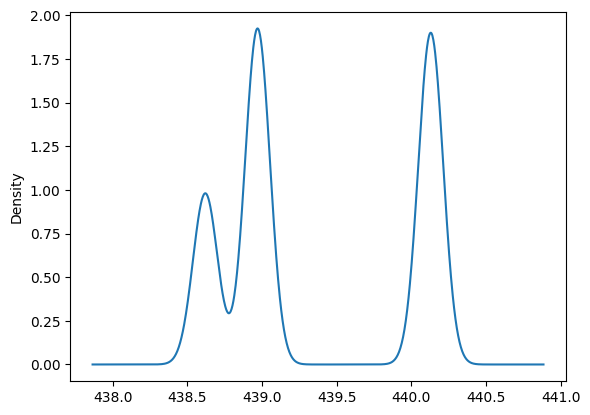

In [ ]:
# Plot the distribution of stock price for iv
df['stock price for iv'].plot(kind='kde')

# Observed a  multimodal distribution

<Axes: ylabel='Density'>

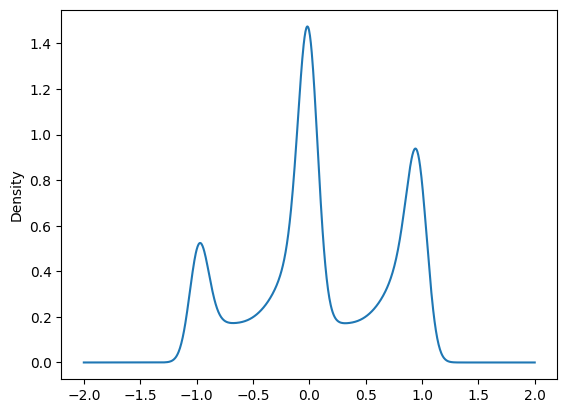

In [ ]:
# Plot the distribution of stock price for delta
df['delta'].plot(kind='kde')

# Observed a  multimodal distribution

<Axes: ylabel='Density'>

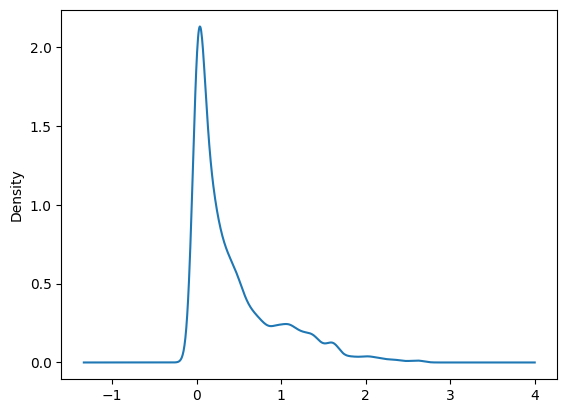

In [ ]:
# Plot the distribution of stock price for vega
df['vega'].plot(kind='kde')

# Observed a right skewed distribution

### Line chart

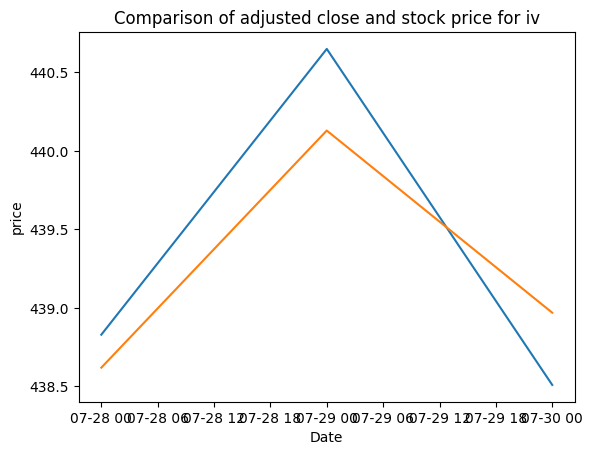

In [ ]:
# Plot the line chart to identify the trend of adjusted close and stock price for iv for a one month time period

for col in ['adjusted close', 'stock price for iv']:
    plt.plot(df['date'], df[col])
    plt.title("Comparison of adjusted close and stock price for iv")
    plt.xlabel("Date")
    plt.ylabel("price")

Text(0, 0.5, 'volume')

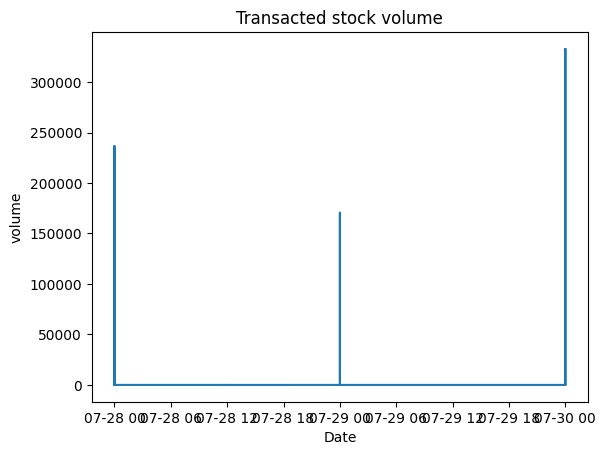

In [ ]:
# Plot the chart

plt.plot(df['date'], df['volume'])
plt.title("Transacted stock volume")
plt.xlabel("Date")
plt.ylabel("volume")

# In some specific days there was high transaction and in some days the there was no transaction
# Observed a high fluctuation in the daily trasnaction volume

### Corrleation

In [ ]:
# Divide the dataset into two parts based on the call/put type for the further analysis

df_call = df[df['call/put'] == 1]  # Dataset only with call records

df_put = df[df['call/put'] == 0]   # Dataset only with put records



<ipython-input-38-aa688ddc56e0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_call.corr()


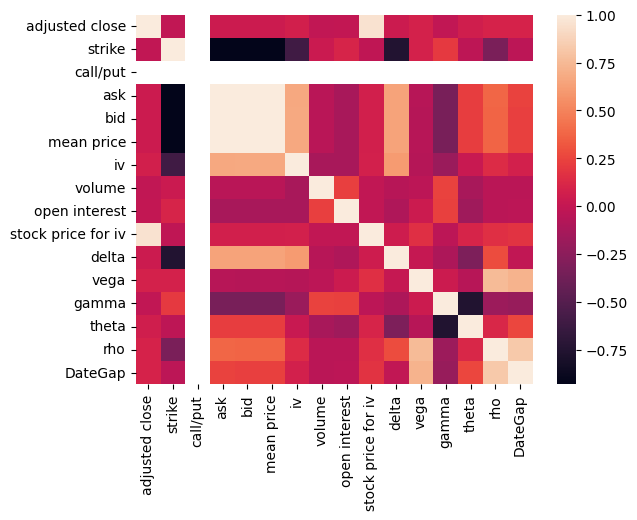

In [ ]:
import seaborn as sns
from scipy import stats

# Caluculated the correlation matrix for the call dataset and visualize using heatmap

cormat = df_call.corr()
sns.heatmap(cormat);


#Stock price for iv and adjusted close have a strong high correlation.
#Apart from that, delta has a significant correlation with ask,bid and mean price.
# And rho and vega also have a significant correlation

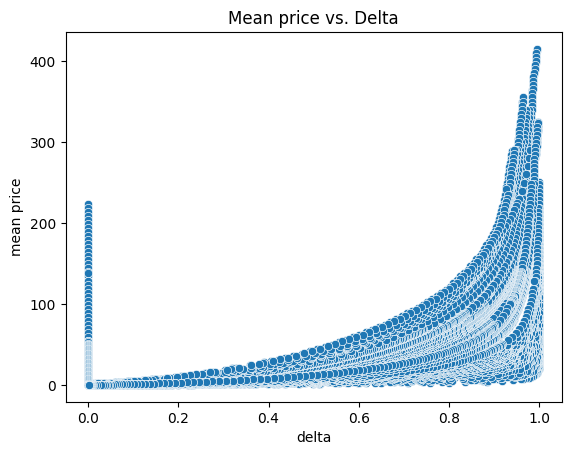

In [ ]:
# Scatter plot for delta and mean price

ax = sns.scatterplot(x="delta", y="mean price", data=df_call)
ax.set_title("Mean price vs. Delta")
ax.set_xlabel("delta");

# Delta has a positive correlation with the mean price
# But the plot is unusual
# Out liers are there in the dataset


<ipython-input-40-b655c33d33a3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_put.corr()


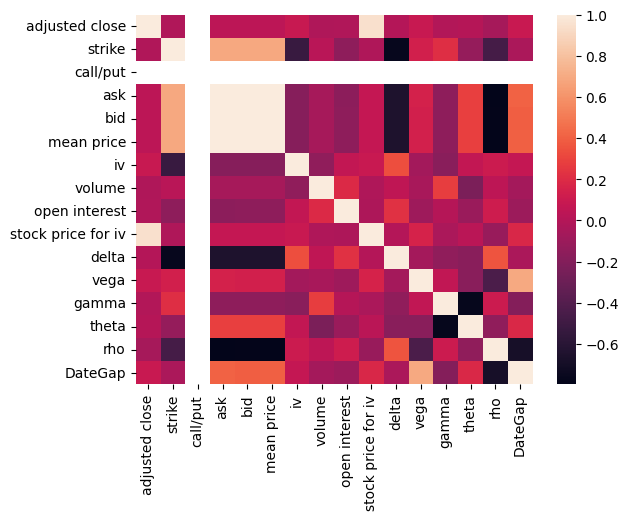

In [ ]:
# Caluculated the correlation matrix for the put dataset and visualize using heatmap

cormat = df_put.corr()
sns.heatmap(cormat);

# Unable to find any significant correlation

### Scatter plot

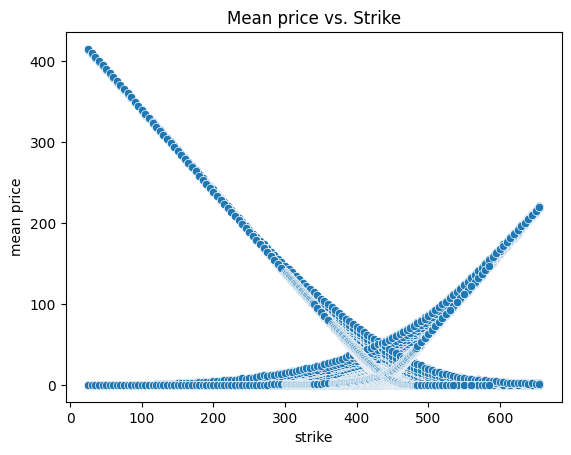

In [ ]:
# # Scatter plot for strike and mean price for whole dataset

ax = sns.scatterplot(x="strike", y="mean price", data=df)
ax.set_title("Mean price vs. Strike")
ax.set_xlabel("strike");

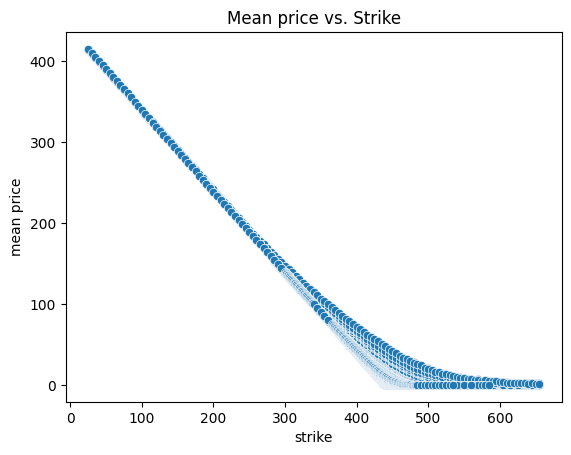

In [ ]:
# Scatter plot for strike and mean price for call dataset

ax = sns.scatterplot(x="strike", y="mean price", data=df_call)
ax.set_title("Mean price vs. Strike")
ax.set_xlabel("strike");

In [ ]:
# After analyzing the above scatter plot, we can conclude that when there is a call, the strike has a positive impact on the average price.

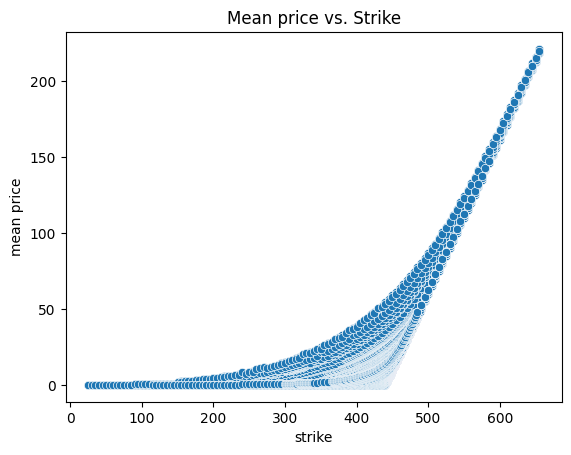

In [ ]:
# Scatter plot for strike and mean price for pull dataset

ax = sns.scatterplot(x="strike", y="mean price", data=df_put)
ax.set_title("Mean price vs. Strike")
ax.set_xlabel("strike");

In [ ]:
# After analyzing the above scatter plot, we can conclude that when there is a put, the strike has a negative impact on the average price.

##**Analysis**

### Predict the strike based on other features (without date)

In [ ]:
#dropping date column
df = df.drop('date', axis=1)
data.head()


#dropping expiration column
df = df.drop('expiration', axis=1)
df.head()



,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,DateGap
0,438.51,215.0,1.0,224.56,223.35,223.955,-1.0,0.0,0.0,438.97,0.0,0.0,0.0,0.0,0.0,0
1,438.51,215.0,0.0,0.01,0.00,0.000,-1.0,0.0,1401.0,438.97,0.0,0.0,0.0,0.0,0.0,0
2,438.51,220.0,1.0,219.56,218.35,218.955,-1.0,0.0,1.0,438.97,0.0,0.0,0.0,0.0,0.0,0
3,438.51,220.0,0.0,0.01,0.00,0.000,-1.0,50.0,328.0,438.97,0.0,0.0,0.0,0.0,0.0,0
4,438.51,225.0,1.0,214.56,213.35,213.955,-1.0,0.0,0.0,438.97,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#feature selection
X = df.drop('strike', axis=1)

#Target variable selection
y = df['strike']
y.head()



0    215.0
1    215.0
2    220.0
3    220.0
4    225.0
Name: strike, dtype: float64

In [ ]:
# data splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)




In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

##**Model Evaluation**

In [ ]:
#predict and evaluate
model.score(X_train, y_train)

0.7755579623583133

In [ ]:
model.score(X_test, y_test)

0.77940986572606

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
# Evaluate the model based on R2 score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 78.0%


In [ ]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

27.587450567131736

##**Utilization of Analysis Result**

The result of the Analysis found mainly from different type of analysis such as:-
1. Descriptive Analysis
2. Prdeictive Analysis


1. Descriptive Analysis
The result of the desriptive analysis is given above in the section of the visualization along with result as common. The result could be better understood with the plot and graph represented in the visualization part. The main key patterns were able to identify after the separation of the call and put as different column in the dataset.

2.Predictive Analysis

After the cleaning of dataset we as a team decided to go with the plan given below.
The total cleaned dataset is received finally as a team we decided to try this multivariate time series to find the strike attribute for the testing data. Multi variate time series is used as the data is influenced with date type attributes.

But due to the lack of domain knowledge and less expertise in the area we were able to the analysis what we have done in the Analysis section. This analysis can be considered as predictive analaysis.

The result of the Predicitve Analysis is given above in the section of Analysis. In this analysis we are trying to predict the strike rate using the linear regression. Due to the complication of having the date attibute in the dataset for the linear regression we decided to remove and try to do the prediction. The predicted score or the model score for the analysis is 77%.

The score for the test and train data set we were able to get around the same percentage of result using the linear regression analysis.

To validate our analysis we further as a team tried to identify the mean absolute error of the result. The mean absolute error is 27.

#**Activty_3**

## **Model 1 Performance - Scaling**

####**StandardScaler**

In [ ]:
#predicting the strike value without scaling

X = df.drop('strike', axis=1)

y = df[['strike']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

model.score(X_train, y_train)
model.score(X_test, y_test)

from sklearn.metrics import r2_score
y_pred =model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Prediction score before scaling is", score)
print("The accuracy of our model before scaling is {}%".format(round(score, 2) *100))

Prediction score before scaling is 0.7778988451051185
The accuracy of our model before scaling is 78.0%


In [ ]:
#scaling the data using standard scalar
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

y_train_stand  = StandardScaler().fit_transform(y_train).flatten()
y_test_stand = StandardScaler().fit_transform(y_test).flatten()


In [ ]:
#predicting the strike value with scaling

scaled_model = LinearRegression()
scaled_model.fit(X_train_stand, y_train_stand)

scaled_model.score(X_train_stand, y_train_stand)
scaled_model.score(X_test_stand, y_test_stand)

from sklearn.metrics import r2_score
y_pred =scaled_model.predict(X_test_stand)
score2 = r2_score(y_test_stand,y_pred)
print("Prediction score after scaling is",score2)
print("The accuracy of our model after scaling is {}%".format(round(score2, 2) *100))

Prediction score after scaling is 0.779572840030598
The accuracy of our model after scaling is 78.0%


**Conclusion**

---


**Scaling**

Data is scaled using standardization. Before standardization, date columns are removed

**Strike** is predicted using linear regression after scaling and compared to the predicted result before scaling. Accuracy has a small difference after scaling and it is slightly incresed. By considering the small changes, it can be said that scaling doesn't affect the results because linear regression is scale variant.

### **Min Max Scaler**

In [ ]:
# data splitting into train and test data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1730.2161402905324


## **Model 2 Performance - Feature Engineering**


### Type1
Adding the date gap column as an additional feature after removing the date and expiration attribute.

In [ ]:
df.head()

,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,DateGap
0,438.51,215.0,1,224.56,223.35,223.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0,0
1,438.51,215.0,0,0.01,0.00,0.000,-1.0,0,1401,438.97,0.0,0.0,0.0,0.0,0.0,0
2,438.51,220.0,1,219.56,218.35,218.955,-1.0,0,1,438.97,0.0,0.0,0.0,0.0,0.0,0
3,438.51,220.0,0,0.01,0.00,0.000,-1.0,50,328,438.97,0.0,0.0,0.0,0.0,0.0,0
4,438.51,225.0,1,214.56,213.35,213.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0,0


###**Analysis**

### Predict the strike based on other features (without date)

In [ ]:
#feature selection
X = df.drop('strike', axis=1)

#Target variable selection
y = df['strike']
y.head()



0    215.0
1    215.0
2    220.0
3    220.0
4    225.0
Name: strike, dtype: float64

In [ ]:
# data splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)




In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [ ]:
#predict and evaluate
model.score(X_train, y_train)

0.7741343928675943

In [ ]:
model.score(X_test, y_test)

0.7743004986529485

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

29.740002968021155

In [ ]:
# Evaluate the model based on R2 score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 77.0%


The variation in the performance is not that considerably different comparing to the base model.

### Type2
Spliting the date data type and doing the analysis

In [ ]:
data= pd.read_csv("data_set.csv")
df2 = pd.DataFrame(data)
df2.head()

,date,adjusted close,expiration,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,2021-07-30,438.51,2021-07-30,215.0,1,224.56,223.35,223.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0
1,2021-07-30,438.51,2021-07-30,215.0,0,0.01,0.00,0.000,-1.0,0,1401,438.97,0.0,0.0,0.0,0.0,0.0
2,2021-07-30,438.51,2021-07-30,220.0,1,219.56,218.35,218.955,-1.0,0,1,438.97,0.0,0.0,0.0,0.0,0.0
3,2021-07-30,438.51,2021-07-30,220.0,0,0.01,0.00,0.000,-1.0,50,328,438.97,0.0,0.0,0.0,0.0,0.0
4,2021-07-30,438.51,2021-07-30,225.0,1,214.56,213.35,213.955,-1.0,0,0,438.97,0.0,0.0,0.0,0.0,0.0


In [ ]:
#converting the object to date datatype
df2['date'] = pd.to_datetime(df2['date'])
df2['expiration'] = pd.to_datetime(df2['expiration'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                221046 non-null  datetime64[ns]
 1   adjusted close      221046 non-null  float64       
 2   expiration          221046 non-null  datetime64[ns]
 3   strike              221046 non-null  float64       
 4   call/put            221046 non-null  int64         
 5   ask                 221046 non-null  float64       
 6   bid                 221046 non-null  float64       
 7   mean price          221046 non-null  float64       
 8   iv                  221046 non-null  float64       
 9   volume              221046 non-null  int64         
 10  open interest       221046 non-null  int64         
 11  stock price for iv  221046 non-null  float64       
 12  delta               221046 non-null  float64       
 13  vega                221046 no

In [ ]:
#spliting the date, month, year of the attribute date and expiration
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day
df2['eyear'] = df2['expiration'].dt.year
df2['emonth'] = df2['expiration'].dt.month
df2['eday'] = df2['expiration'].dt.day

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                221046 non-null  datetime64[ns]
 1   adjusted close      221046 non-null  float64       
 2   expiration          221046 non-null  datetime64[ns]
 3   strike              221046 non-null  float64       
 4   call/put            221046 non-null  int64         
 5   ask                 221046 non-null  float64       
 6   bid                 221046 non-null  float64       
 7   mean price          221046 non-null  float64       
 8   iv                  221046 non-null  float64       
 9   volume              221046 non-null  int64         
 10  open interest       221046 non-null  int64         
 11  stock price for iv  221046 non-null  float64       
 12  delta               221046 non-null  float64       
 13  vega                221046 no

Analysis

In [ ]:
#dropping date column

df2 = df2.drop('date', axis=1)

#dropping expiration column
df2 = df2.drop('expiration', axis=1)
df2.head()

,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,...,vega,gamma,theta,rho,year,month,day,eyear,emonth,eday
0,438.51,215.0,1,224.56,223.35,223.955,-1.0,0,0,438.97,...,0.0,0.0,0.0,0.0,2021,7,30,2021,7,30
1,438.51,215.0,0,0.01,0.00,0.000,-1.0,0,1401,438.97,...,0.0,0.0,0.0,0.0,2021,7,30,2021,7,30
2,438.51,220.0,1,219.56,218.35,218.955,-1.0,0,1,438.97,...,0.0,0.0,0.0,0.0,2021,7,30,2021,7,30
3,438.51,220.0,0,0.01,0.00,0.000,-1.0,50,328,438.97,...,0.0,0.0,0.0,0.0,2021,7,30,2021,7,30
4,438.51,225.0,1,214.56,213.35,213.955,-1.0,0,0,438.97,...,0.0,0.0,0.0,0.0,2021,7,30,2021,7,30


In [ ]:
X = df2.drop('strike', axis=1)

#Target variable selection
y = df2['strike']
y.head()

# data splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [ ]:
#predict and evaluate
model.score(X_test, y_test)

0.7740883356853352

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

29.662747186168183

In [ ]:
# Evaluate the model based on R2 score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 77.0%


### Conclusion

Two type of feature engineering has been performed. They are
1. Adding the date gap column as an additional feature after removing the date and expiration attribute.
2.Spliting the date data type and doing the analysis


With performance of the both type of feature engineering there is no considerable changes in the result of the model







## **Model 3 performance( Dimension reduction PCA)**

###**Using PCA for rank the feature importance**

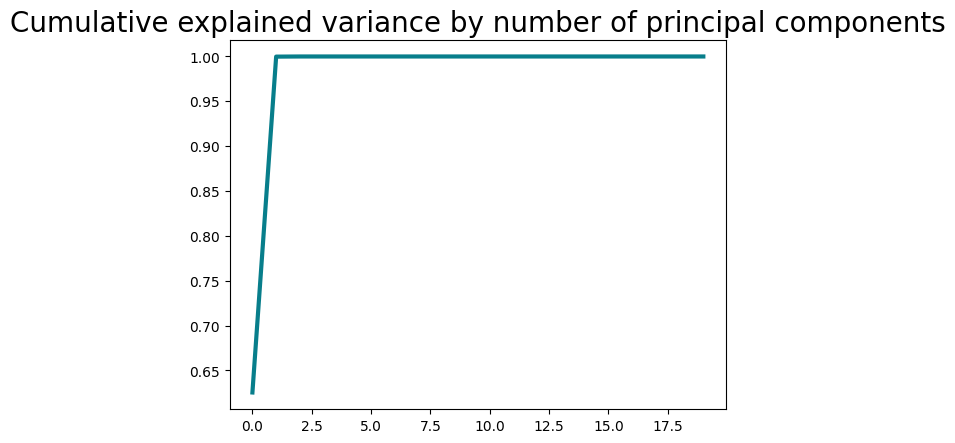

In [ ]:
# Use PCA to find the N
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)



# Plot the N and explained variance ratio

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

This graph shows that we can explain 99% of the variance in our source dataset with the only two principal components.

In [ ]:
# get the PCA loadings - coefficients of the linear combination of the original variables

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [ ]:
# View the PCA loadings
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
adjusted close,0.024154,-0.048437,0.014942,-2.699355,1.889932e-01,-2.747524e+00,-0.009266,8.568435e-03,4.047269e-03,-1.203030e-03,5.506959e-03,-1.606682e-03,-3.836302e-02,1.568135e-01,5.300915e-03,-1.511518e-05,6.915663e-05,2.413906e-06,-0.000000e+00,-0.000000e+00
call/put,-0.043801,0.020128,0.140535,0.000138,1.686571e-04,-5.973114e-04,-0.007661,-2.772723e-01,8.159218e-03,3.378219e-01,5.971336e-02,1.482602e-01,8.197587e-02,2.353188e-02,-6.305940e-02,-1.694106e-04,-8.808961e-04,-4.189201e-05,-8.907966e-35,2.843282e-36
ask,-8.859946,1.498491,59.828301,-0.020361,-4.728432e-03,5.098049e-03,0.137196,1.295753e-01,5.051783e-01,-2.522970e-02,1.898677e-01,1.040567e-02,-3.311550e-02,-9.203874e-03,-5.498329e-03,1.870534e-02,3.235144e-04,7.200913e-07,-2.238114e-34,-1.057340e-34
bid,-8.704804,1.468901,59.216120,0.023522,7.724197e-03,-4.372429e-03,-0.138778,-1.295706e-01,-5.063267e-01,2.399381e-02,-1.879508e-01,-1.096781e-02,3.536664e-02,9.775325e-03,5.322731e-03,1.905540e-02,1.584012e-04,3.370368e-06,-1.872182e-34,-9.912902e-35
mean price,-8.782055,1.483598,59.523319,0.001250,1.164077e-03,1.853689e-04,-0.001770,-8.158237e-05,-4.765850e-03,-7.792980e-04,-3.899781e-03,1.012315e-03,-2.209462e-03,-5.435287e-04,3.262195e-04,-3.775683e-02,-4.857562e-04,-4.073704e-06,4.106820e-34,2.047541e-34
iv,-0.010358,-0.026863,0.084724,-0.003505,-5.205151e-03,5.074600e-03,-0.016626,-3.105223e-02,-2.459345e-02,6.030592e-04,-9.999586e-03,-1.498936e-01,-3.099257e-02,1.979808e-03,-1.315059e-01,-9.246790e-05,-3.101462e-04,-5.871555e-06,1.686175e-34,4.928873e-35
volume,2575.302810,4436.692793,0.052520,-0.000073,-1.217589e-04,-3.650778e-05,-0.000018,4.328673e-07,4.366699e-06,-1.000459e-07,-1.928627e-06,-1.151293e-06,-1.180888e-07,-4.780712e-09,-5.738929e-07,-9.769316e-10,5.738587e-08,-8.481083e-10,-1.336893e-39,-2.325111e-40
open interest,5734.256228,-1992.549314,0.249909,0.000187,-1.511167e-05,1.366038e-05,0.000068,1.047419e-05,6.492479e-06,1.281441e-06,2.470183e-07,1.548432e-06,4.472706e-07,1.051407e-07,-1.751673e-07,1.054334e-09,4.959126e-09,2.731986e-11,-1.259086e-39,-1.324476e-40
stock price for iv,0.023944,-0.048473,0.015167,-2.730598,1.846816e-01,-2.680326e+00,-0.009028,8.334732e-03,-4.390140e-03,1.678887e-04,-5.754173e-03,2.029411e-03,3.946387e-02,-1.596506e-01,-5.869133e-03,1.848940e-05,-1.113456e-04,-3.879541e-06,-1.587646e-37,-3.405086e-38
delta,-0.012037,-0.002655,0.208018,0.003542,-6.052435e-03,-1.923817e-02,-0.024559,-3.940293e-01,-1.455777e-02,3.860422e-01,5.039721e-02,-1.293127e-01,-6.925107e-02,-2.041678e-02,5.534702e-02,3.562935e-05,1.134652e-03,4.366716e-05,7.841299e-35,2.556078e-36


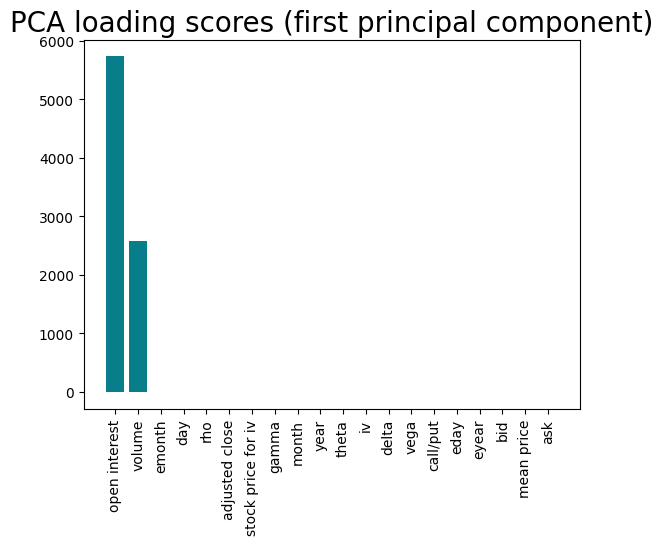

In [ ]:
# Visualize the correlations between all of the input features and the first principal components

pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# data splitting into train and test data
model_3_X_train, model_3_X_test, model_3_y_train, model_3_y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Initialize the PCA
new_pca = PCA(n_components=2)

# fit and transform data
X_train_pca = new_pca.fit_transform(model_3_X_train)
X_test_pca = new_pca.transform(model_3_X_test)

In [ ]:
X_train_pca

array([[-1484.45979328,   220.34900168],
       [ -632.75858564,  -109.73698855],
       [-1202.78666505,    94.94273573],
       ...,
       [-1012.08721342,     9.93948202],
       [-1674.81917579,   305.06890412],
       [ -705.75275185,   161.42886974]])

In [ ]:
# Fitting the model
model_3 = LinearRegression()
model_3.fit(X_train_pca, model_3_y_train)

LinearRegression()

In [ ]:
# Predict
model_3_y_pred =model_3.predict(X_test_pca)

In [ ]:
#Evaluate
model_3.score(X_test_pca, model_3_y_test)

0.004480895962643894

In [ ]:
# Evaluate the model based on R2 score
from sklearn.metrics import r2_score
score = r2_score(model_3_y_test,model_3_y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 0.0%


In [ ]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(model_3_y_test,model_3_y_pred)

70.01889747806653


*   Base model accuracy :- 0.7774354695819347
*   Model accuracy after using PCA :- 0.004840254110084263
*   Base model Mean Squared Error :- 29.89921361163598
*   Model Mean Squared Error after using PCA:- 69.62873867858842


In this experiment PCA highly affect the accuracy of the model. It went from 0.7774354695819347 to 0.004840254110084263.

The Principal component analysis(PCA) can performs best when it is applied to a dataset where all of the features are linearly related. So there is a high chnace for the features in our dataset are not linearly related.

And if the original features already contain crucial information for predicting the target variable, reducing the dimensionality through PCA might result in the loss of relevant information.

# **Conclusion**

In this Activity 3 we as a team tried to do the activity 2 which we decided to predict the strike feature using the linear prediction model. In this activity we decided to the further pre process the data using, 1.Scaling 2.Feature Engineering 3.Dimension Reduction

1.   Scaling


**Scaling**

Data is scaled using standardization.Before standardization, date columns are removed

**Strike** is predicted using linear regression after scaling and compared to the predicted result before scaling. Accuracy is same before and after scaling.

**Min Max Scaling**

This type of scaling is also performed in the model1.

2.   Feature Engineering

Two type of feature engineering has been performed. They are


1.   Type 1

Adding the date gap column as an additional feature after removing the date and expiration attribute. Spliting the date data type and doing the analysis With performance of the both type of feature engineering there is no considerable changes in the result of the model

2.   Type 2

From this activity we were able to understand that feature of the date type attribute does not significantly affect the prediction of the 'strike' attribute using the linear regression model.

3.   Dimensional Reduction

method is used to The Principal Componenent Analysis (PCA) method is used to rank the feature importance by changing the dimension in various way.


*   Base model accuracy :- 0.7774354695819347
*   Model accuracy after using PCA :- 0.004840254110084263
*   Base model Mean Squared Error :- 29.89921361163598
*   Model Mean Squared Error after using PCA:- 69.62873867858842


In this experiment PCA highly affect the accuracy of the model. It went from 0.7774354695819347 to 0.004840254110084263.

The Principal component analysis(PCA) can performs best when it is applied to a dataset where all of the features are linearly related. So there is a high chnace for the features in our dataset are not linearly related.

And if the original features already contain crucial information for predicting the target variable, reducing the dimensionality through PCA might result in the loss of relevant information.